In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://data.world/health/opioid-overdose-deaths
#overdose_deaths = pd.read_csv('./datasets/bdc/Multiple Cause of Death, 1999-2014 v1.1.csv')

# https://public.opendatasoft.com/explore/dataset/opioid-overdose-deaths-by-type-of-opioid/table/
overdose = pd.read_csv('datasets/bdc/opioid-overdose-deaths-by-type-of-opioid.csv', sep=';')

# https://data.world/carlvlewis/u-s-metro-areas-violent-crime-rates-by-type-1970-2015
crime = pd.read_csv('./datasets/bdc/ucr_crime_1975_2015.csv')

# https://public.opendatasoft.com/explore/dataset/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj/export/
pre_od = pd.read_csv('datasets/bdc/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj.csv', sep=';')

In [3]:
us_state_abbrev = {
    'Colorado': 'CO',
    'Washington': 'WA',
}

In [4]:
overdose.columns

Index(['Location', 'Year', 'Heroin', 'Heroin (missing reason)', 'Methadone',
       'Methadone (missing reason)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)',
       'Footnotes'],
      dtype='object')

In [5]:
od_columns = ['Location', 'Year', 'Heroin',
           'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
           'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'
          ]
overdose_col = overdose[od_columns][overdose['Location'] == 'Colorado']
print(overdose_col.shape)

overdose_wash = overdose[od_columns][overdose['Location'] == 'Washington']
print(overdose_wash.shape)

overdose_comb = overdose[od_columns][(overdose['Location'] == 'Colorado') | (overdose['Location'] == 'Washington')]
print(overdose_comb.shape)

(17, 5)
(17, 5)
(34, 5)


In [81]:
GREY = (0, 0, 0, 0.3)
GREY1 = (0.5, 0.5, 0.5, 0.5)
DARKGREY = (0, 0, 0, 0.8)

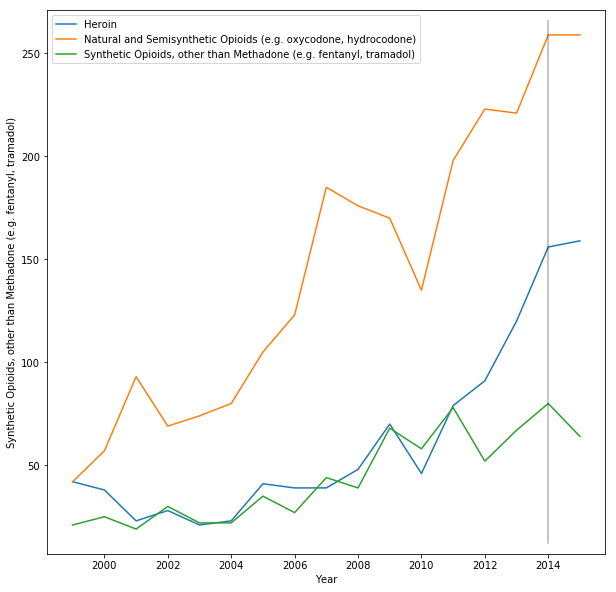

In [7]:
plt.figure(figsize=(10, 10))
for column in od_columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_col, label=column)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

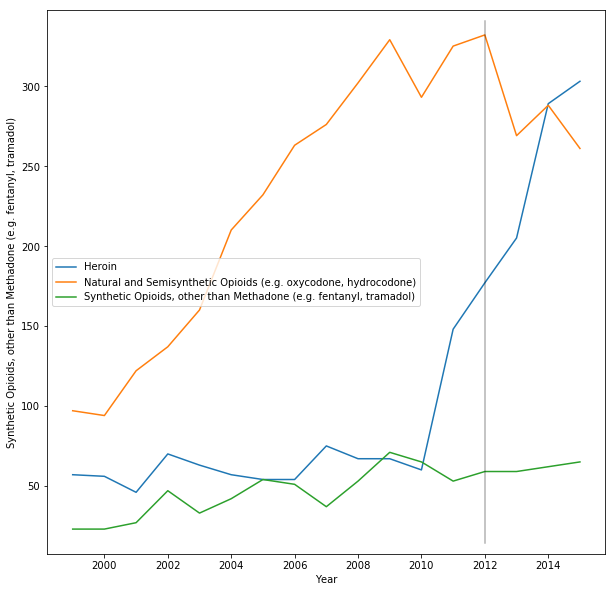

In [8]:
plt.figure(figsize=(10, 10))
for column in od_columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_wash, label=column)
plt.axvline(2012, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

In [9]:
crime['State'] = ''

for key, value in us_state_abbrev.items():
    crime['State'][crime['ORI'].str.startswith(value, na=False)] = key

crime.columns

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['ORI', 'year', 'department_name', 'total_pop', 'homs_sum', 'rape_sum',
       'rob_sum', 'agg_ass_sum', 'violent_crime', 'months_reported',
       'violent_per_100k', 'homs_per_100k', 'rape_per_100k', 'rob_per_100k',
       'agg_ass_per_100k', 'source', 'url', 'State'],
      dtype='object')

In [10]:
crime_columns = ['year', 'total_pop', 'violent_per_100k', 'rob_per_100k', 'agg_ass_per_100k']

crime_col = crime[crime_columns][crime['State'] == 'Colorado']
crime_wash = crime[crime_columns][crime['State'] == 'Washington']

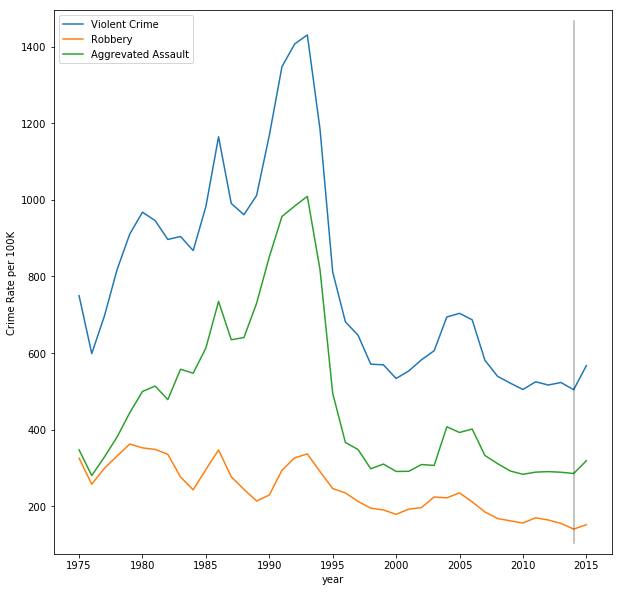

In [11]:
plt.figure(figsize=(10, 10))
labels = {'violent_per_100k': 'Violent Crime',
          'rob_per_100k': 'Robbery',
          'agg_ass_per_100k': 'Aggrevated Assault'
         }
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_col, label=labels[column], ci=None)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.ylabel('Crime Rate per 100K')
plt.show()

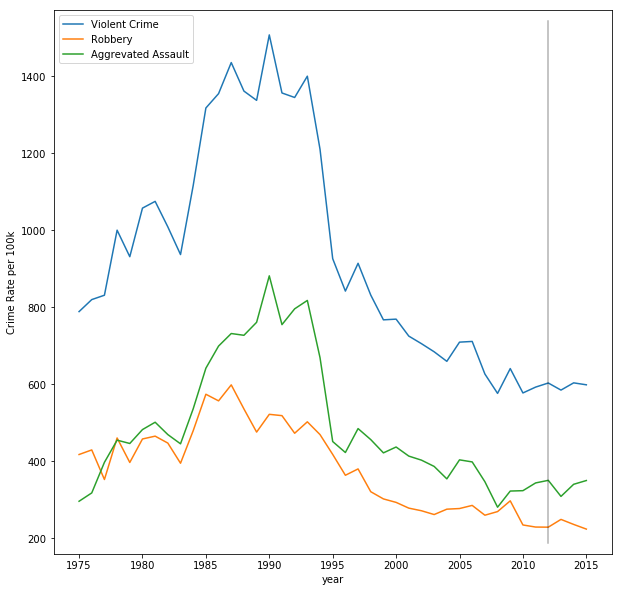

In [12]:
plt.figure(figsize=(10, 10))
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_wash, label=labels[column])
plt.axvline(2012, 0.02, 0.98, c=GREY, label='Legalization')
plt.ylabel('Crime Rate per 100k')
plt.show()

In [13]:
pre_od.columns

Index(['Location', 'Year', 'Prescription Opioid Overdose Deaths',
       'Prescription Opioid Overdose Deaths (missing reason)', 'Footnotes'],
      dtype='object')

In [14]:
columns = ['Year', 'Prescription Opioid Overdose Deaths']

pre_od_col = pre_od[columns][pre_od['Location'] == 'Colorado']
pre_od_wash = pre_od[columns][pre_od['Location'] == 'Washington']

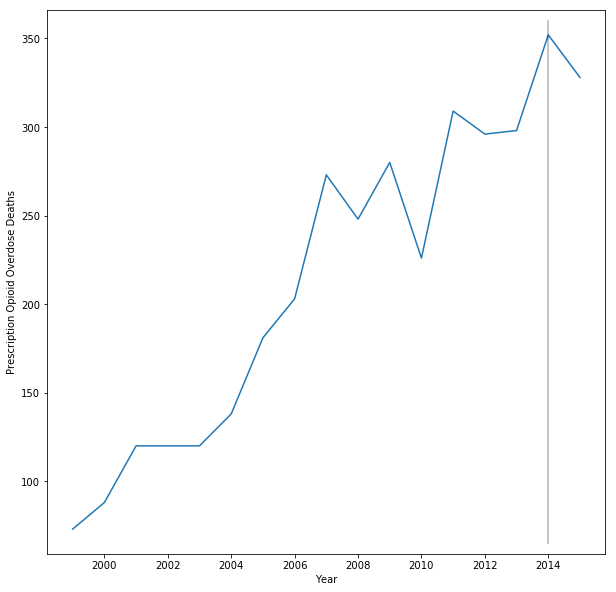

In [15]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_col)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

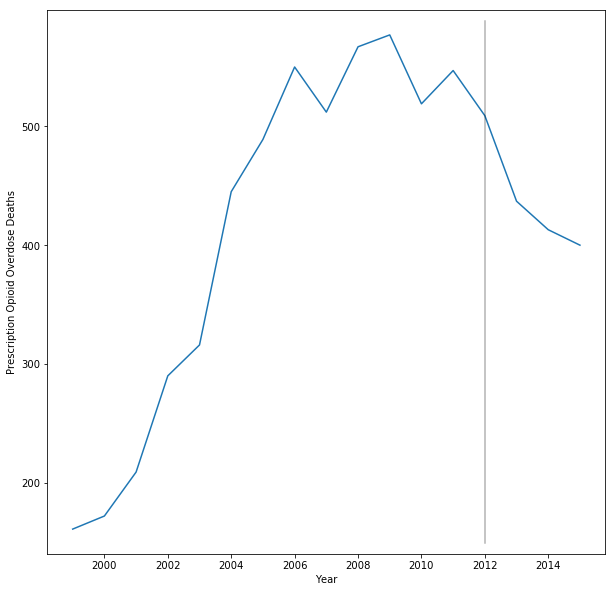

In [16]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_wash)
plt.axvline(2012, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

In [129]:
import statsmodels.api as sm

def calculate_slopes(source, columns, year_label='Year'):
    data = []
    result_columns = []
    for column in columns:
        if column == year_label:
            continue
        result_columns.append(column)
            
        y = source[column]
        x1 = source[year_label]

        x = sm.add_constant(x1)

        results = sm.OLS(y, x).fit()
        
        m = results.params[year_label]
        b = results.params['const']
        
        data.append((m, b))
    
    return pd.DataFrame(columns=result_columns, data=[data])

In [24]:
y = overdose_col[od_columns[2]]
x1 = overdose_col['Year']
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.params

const   -14827.639706
Year         7.419118
dtype: float64

In [25]:
overdose_col_slopes = calculate_slopes(overdose_col, od_columns[1:])
overdose_col_slopes

,Heroin,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)"
0,"(7.41911764705885, -14827.6397058824)","(13.558823529411795, -27067.323529411828)","(3.7671568627450953, -7516.50735294117)"


In [27]:
overdose_col_before = overdose_col[overdose_col['Year'] <= 2014]
overdose_col_after = overdose_col[overdose_col['Year'] >= 2014]

overdose_wash_before = overdose_wash[overdose_wash['Year'] <= 2012]
overdose_wash_after = overdose_wash[overdose_wash['Year'] >= 2012]

In [29]:
overdose_col_before_lines = calculate_slopes(overdose_col_before, od_columns[1:])
overdose_col_after_lines = calculate_slopes(overdose_col_after, od_columns[1:])

overdose_wash_before_lines = calculate_slopes(overdose_wash_before, od_columns[1:])
overdose_wash_after_lines = calculate_slopes(overdose_wash_after, od_columns[1:])

In [43]:
def make_model(lines, years):
    results = []
    for year in years:
        data = [year]
        for column in lines.columns:
            m = lines[column].iloc[0][0]
            b = lines[column].iloc[0][1]
            data.append(m * year + b)
        results.append(data)
    return pd.DataFrame(columns=['Year'] + lines.columns.tolist(), data=results)

In [49]:
overdose_col_before_model = make_model(overdose_col_before_lines, [1999, 2014])
overdose_col_after_model = make_model(overdose_col_after_lines, [2014, 2015])

overdose_wash_before_model = make_model(overdose_wash_before_lines, [1999, 2012])
overdose_wash_after_model = make_model(overdose_wash_after_lines, [2012, 2015])

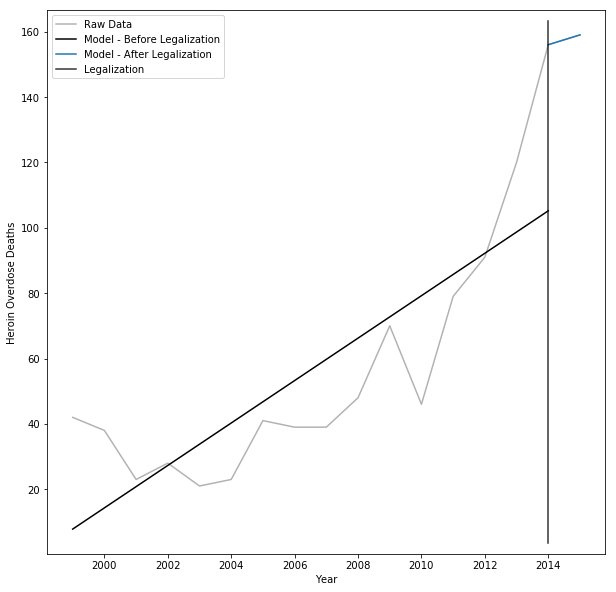

In [105]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col, color=GREY, label='Raw Data')
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col_before_model,
                  label='Model - Before Legalization', color=(0, 0, 0))
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel('Heroin Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

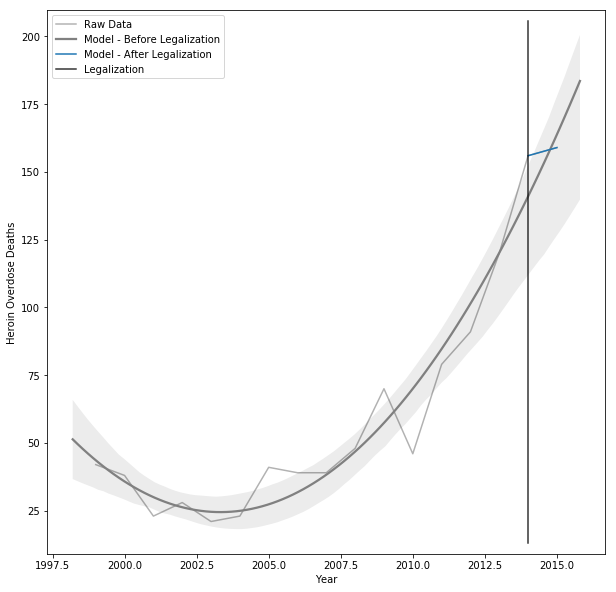

In [100]:
plt.figure(figsize=(10, 10))
label = od_columns[2]
ax = sns.lineplot(x='Year', y=label, data=overdose_col, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_col_before, label='Model - Before Legalization',
                 order=2, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

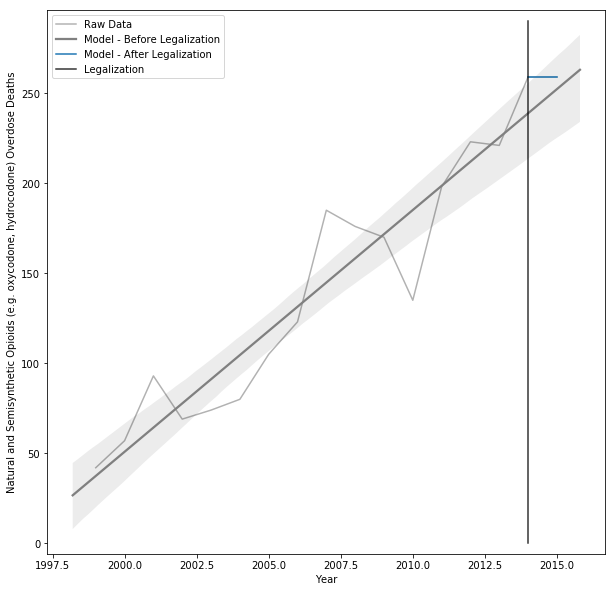

In [99]:
plt.figure(figsize=(10, 10))
label = od_columns[3]
ax = sns.lineplot(x='Year', y=label, data=overdose_col, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_col_before, label='Model - Before Legalization',
                 order=1, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

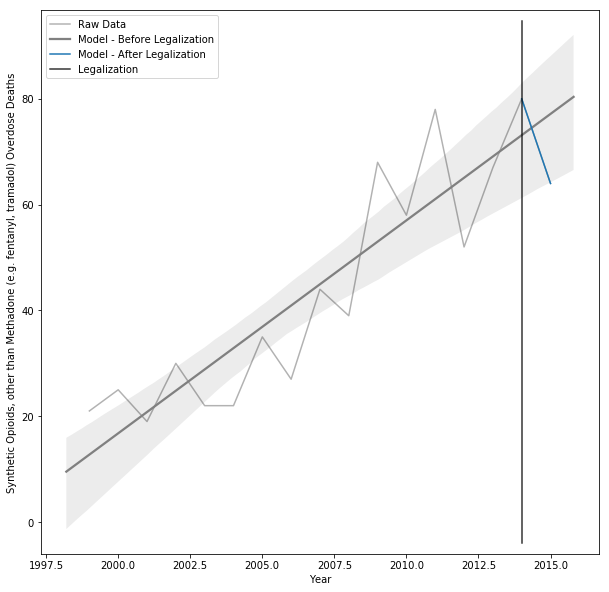

In [111]:
plt.figure(figsize=(10, 10))
label = od_columns[4]
ax = sns.lineplot(x='Year', y=label, data=overdose_col, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_col_before, label='Model - Before Legalization',
                 order=1, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

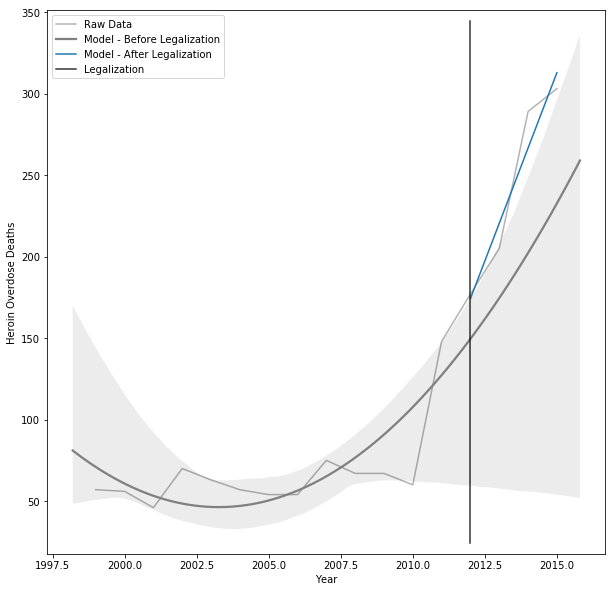

In [108]:
plt.figure(figsize=(10, 10))
label = od_columns[2]
ax = sns.lineplot(x='Year', y=label, data=overdose_wash, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_wash_before, label='Model - Before Legalization',
                 order=2, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_wash_after_model, label='Model - After Legalization')
plt.axvline(2012, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

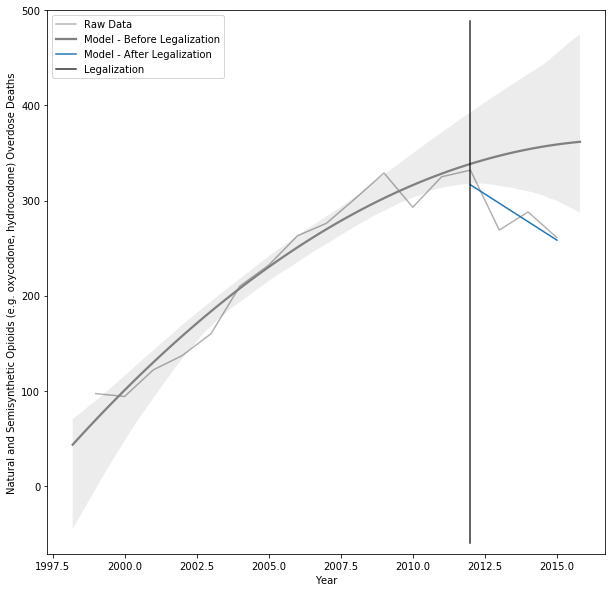

In [96]:
plt.figure(figsize=(10, 10))
label = od_columns[3]
ax = sns.lineplot(x='Year', y=label, data=overdose_wash, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_wash_before, label='Model - Before Legalization',
                 order=2, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_wash_after_model, label='Model - After Legalization')
plt.axvline(2012, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

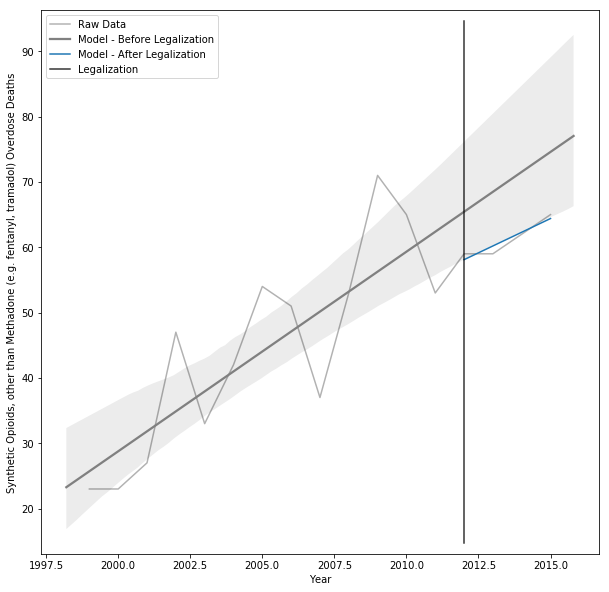

In [113]:
plt.figure(figsize=(10, 10))
label = od_columns[4]
ax = sns.lineplot(x='Year', y=label, data=overdose_wash, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=overdose_wash_before, label='Model - Before Legalization',
                 order=1, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=overdose_wash_after_model, label='Model - After Legalization')
plt.axvline(2012, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

In [115]:
pre_od_col_before = pre_od_col[pre_od_col['Year'] <= 2014]
pre_od_col_after = pre_od_col[pre_od_col['Year'] >= 2014]

pre_od_wash_before = pre_od_wash[pre_od_wash['Year'] <= 2012]
pre_od_was_after = pre_od_wash[pre_od_wash['Year'] >= 2012]

In [116]:
pre_od_col_after_line = calculate_slopes(pre_od_col_after, ['Prescription Opioid Overdose Deaths'])
pre_od_wash_after_line = calculate_slopes(pre_od_was_after, ['Prescription Opioid Overdose Deaths'])

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [117]:
pre_od_col_after_model = make_model(pre_od_col_after_line, [2014, 2015])
pre_od_wash_after_model = make_model(pre_od_wash_after_line, [2012, 2015])

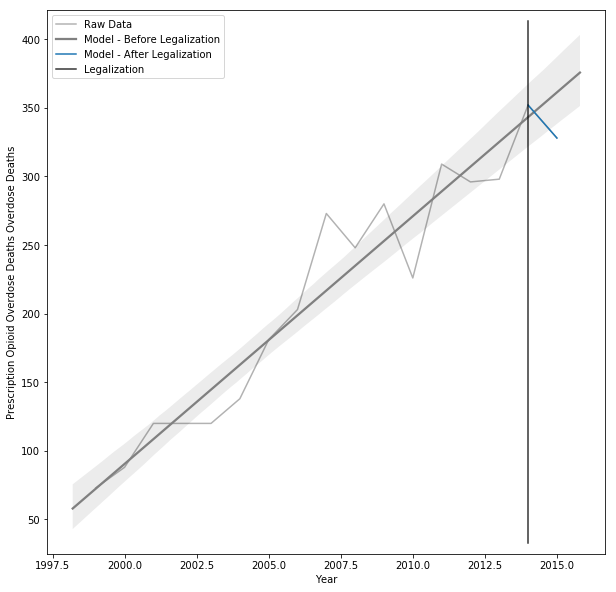

In [118]:
plt.figure(figsize=(10, 10))
label = 'Prescription Opioid Overdose Deaths'
ax = sns.lineplot(x='Year', y=label, data=pre_od_col, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=pre_od_col_before, label='Model - Before Legalization',
                 order=1, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=pre_od_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

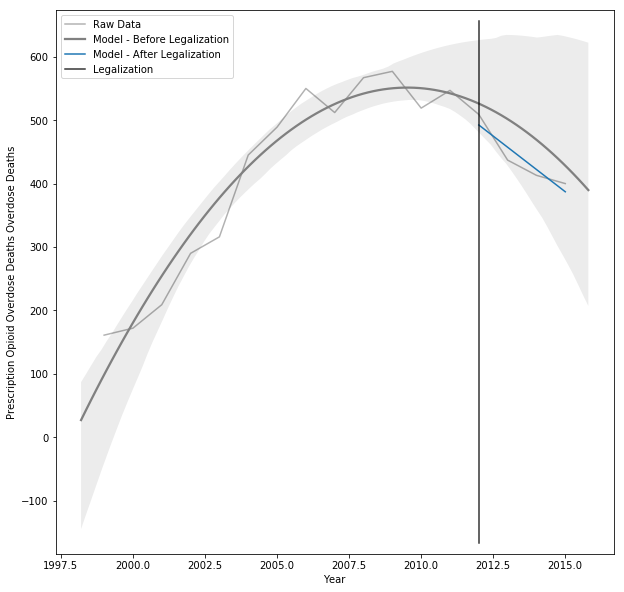

In [120]:
plt.figure(figsize=(10, 10))
label = 'Prescription Opioid Overdose Deaths'
ax = sns.lineplot(x='Year', y=label, data=pre_od_wash, color=GREY, label='Raw Data')
ax = sns.regplot(x='Year', y=label, data=pre_od_wash_before, label='Model - Before Legalization',
                 order=2, scatter=False, color=GREY1)
ax = sns.lineplot(x='Year', y=label, data=pre_od_wash_after_model, label='Model - After Legalization')
plt.axvline(2012, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel(label + ' Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

In [125]:
crime_col_gt95 = crime_col[crime_col['year'] > 1995]
crime_wash_gt95 = crime_wash[crime_wash['year'] > 1995]

In [126]:
crime_col_before = crime_col_gt95[crime_col_gt95['year'] <= 2014]
crime_col_after = crime_col_gt95[crime_col_gt95['year'] >= 2014]

crime_wash_before = crime_wash_gt95[crime_wash_gt95['year'] <= 2012]
crime_wash_after = crime_wash_gt95[crime_wash_gt95['year'] >= 2012]

In [128]:
crime_col_after_lines = calculate_slopes(crime_col_after, crime_columns[2:])
crime_wash_after_lines = calculate_slopes(crime_wash_after, crime_columns[2:])

KeyError: 'Year'